# CNN step

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from skimage import transform,data

In [22]:
def gray(img):
    assert img.shape[-1] == 3, "Wrong color format"
    return img[:,:,0]*0.299 + img[:,:,1]*0.587 + img[:,:,2]*0.114

## Standarlize training data

In [84]:
import os
X_train = []
X_label = []
for file in os.listdir():
    if "CNN_TRAIN" not in file:
        continue
    raw = plt.imread(file)
    raw = gray(raw)
    raw = transform.resize(raw, (28, 28))
    raw = np.expand_dims(raw,0)
    raw = np.expand_dims(raw,0)
    raw = torch.from_numpy(raw).float()
    X_train.append(raw)
    X_label.append([int(file.split('_')[-1].split('.')[0])])
print(X_label)

[[0], [0], [0], [0], [1], [1]]


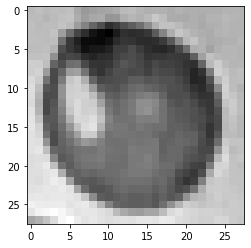

In [94]:
plt.imshow(X_train[0][0][0],cmap=plt.cm.gray)
plt.show()

## Construct NN model

In [86]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [87]:
class Model(nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        #128,128
        self.conv1 = nn.Conv2d(1,6,kernel_size=5,padding=2)
        #124,124
        self.conv2 = nn.Conv2d(6,16,kernel_size=5)
        #58,58
        self.conv3 = nn.Conv2d(16,120,kernel_size=5)
        self.mp = nn.MaxPool2d(2)
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(120,84)
        self.fc2 = nn.Linear(84,2)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self,x):
        in_size = x.size(0)
        out = self.relu(self.mp(self.conv1(x)))
        out = self.relu(self.mp(self.conv2(out)))
        out = self.relu(self.conv3(out))
        out = out.view(in_size, -1)
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return self.logsoftmax(out)

In [88]:
model = Model()
loss_fn = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.5)

In [95]:
for epoch in range(30):
    for t in range(len(X_train)):
        data = Variable(torch.Tensor(X_train[t]))
        pred = model(data)
        target = Variable(torch.LongTensor(X_label[t]))
        loss = loss_fn(pred,target)
        print(epoch,t,loss.data)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

<ipython-input-87-4e1e2a3f8cfe>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.logsoftmax(out)


0 0 tensor(0.4101)
0 1 tensor(0.4107)
0 2 tensor(0.4087)
0 3 tensor(0.4055)
0 4 tensor(1.1062)
0 5 tensor(1.1011)
1 0 tensor(0.4100)
1 1 tensor(0.4106)
1 2 tensor(0.4087)
1 3 tensor(0.4054)
1 4 tensor(1.1064)
1 5 tensor(1.1012)
2 0 tensor(0.4099)
2 1 tensor(0.4106)
2 2 tensor(0.4086)
2 3 tensor(0.4054)
2 4 tensor(1.1065)
2 5 tensor(1.1013)
3 0 tensor(0.4099)
3 1 tensor(0.4105)
3 2 tensor(0.4086)
3 3 tensor(0.4053)
3 4 tensor(1.1066)
3 5 tensor(1.1014)
4 0 tensor(0.4098)
4 1 tensor(0.4105)
4 2 tensor(0.4085)
4 3 tensor(0.4053)
4 4 tensor(1.1067)
4 5 tensor(1.1015)
5 0 tensor(0.4098)
5 1 tensor(0.4104)
5 2 tensor(0.4085)
5 3 tensor(0.4052)
5 4 tensor(1.1068)
5 5 tensor(1.1016)
6 0 tensor(0.4097)
6 1 tensor(0.4104)
6 2 tensor(0.4084)
6 3 tensor(0.4052)
6 4 tensor(1.1069)
6 5 tensor(1.1017)
7 0 tensor(0.4097)
7 1 tensor(0.4103)
7 2 tensor(0.4084)
7 3 tensor(0.4051)
7 4 tensor(1.1070)
7 5 tensor(1.1018)
8 0 tensor(0.4096)
8 1 tensor(0.4103)
8 2 tensor(0.4083)
8 3 tensor(0.4051)
8 4 tensor(1

## Test

In [134]:
test = plt.imread("CNN_TRAIN_2_0.jpeg")
test = gray(test)
test = transform.resize(test, (28, 28))
test = np.expand_dims(test,0)
test = np.expand_dims(test,0)
test = torch.from_numpy(test).float()

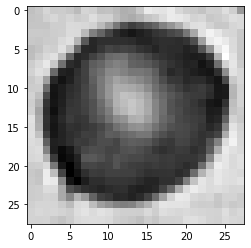

In [135]:
plt.imshow(test[0][0],cmap=plt.cm.gray)
plt.show()

In [136]:
predict = model(test).data.max(1, keepdim=True)[1]
print(int(predict[0][0]))

0


<ipython-input-87-4e1e2a3f8cfe>:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self.logsoftmax(out)


In [133]:
correct = 0
total = 0
for file in os.listdir():
    if "CNN_TEST" not in file:
        continue
    total += 1
    raw = plt.imread(file)
    raw = gray(raw)
    raw = transform.resize(raw, (28, 28))
    raw = np.expand_dims(raw,0)
    raw = np.expand_dims(raw,0)
    raw = torch.from_numpy(raw).float()
    label = int(file.split('_')[-1].split('.')[0])
    out = model(raw)
    if int(out.data.max(1, keepdim=True)[1][0][0]) == label:
        correct += 1
print(correct/total)

0.9813333333333334
